[View in Colaboratory](https://colab.research.google.com/github/iiwakuralain/TCC2/blob/master/MLP_regressor_single_input.ipynb)

In [0]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [268]:
!pip install -q xlrd
!git clone https://github.com/iiwakuralain/TCC2

Cloning into 'TCC2'...
remote: Counting objects: 71, done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 71 (delta 29), reused 27 (delta 8), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [269]:
cd TCC2

/content/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2/TCC2


In [270]:
ls

db.csv                           MLP_regressor_single_input.ipynb
db_ok.csv                        neural_MLPRegressor.ipynb
LICENSE                          neural_MLPRegressor_one_input.ipynb
linear.ipynb                     NeuralNetwork_Simple_Test.ipynb
MLP_regressor_multi_input.ipynb


In [0]:
import pandas as pd
df = pd.read_csv('db_ok.csv')

In [0]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 

In [0]:
joinville = df.loc[(df['cidade'] == 1)]

In [274]:
joinville.head()

,cidade,m2Aprox,4mm,3mm,$4mm,$3mm
0,1,58.652928,18054.0,15045.00000,297.782896,256.508935
1,1,148.766748,45000.0,38160.00000,297.782896,256.508935
2,1,17.855129,5000.0,4580.00000,297.782896,256.508935
3,1,120.552592,35898.5,30922.81693,297.782896,256.508935
4,1,14.619374,4375.0,3750.00000,297.782896,256.508935


In [275]:
joinville.shape

(95, 6)

In [276]:
mydf = joinville.astype('int64')
print(mydf.info()) # Overview of dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 0 to 94
Data columns (total 6 columns):
cidade     95 non-null int64
m2Aprox    95 non-null int64
4mm        95 non-null int64
3mm        95 non-null int64
$4mm       95 non-null int64
$3mm       95 non-null int64
dtypes: int64(6)
memory usage: 5.2 KB
None


In [277]:
df_joinville = mydf[['m2Aprox']]
y = mydf[['3mm']]

# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(df_joinville, y, test_size=0.20)
print(X_train.shape, y_train.shape)

((76, 1), (76, 1))


In [0]:
from sklearn.neural_network import MLPRegressor

In [0]:
clf = MLPRegressor(solver='lbfgs',
                    hidden_layer_sizes=(10,),random_state=1)

In [280]:
clf.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(10,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [0]:
predictions = clf.predict(X_test)

In [282]:
buildCompareT = {'m2Aprox': X_test['m2Aprox'], 
                 'yTest': y_test['3mm'], 
                 'yPredicted':predictions.astype('int64')}

compareT = pd.DataFrame(data=buildCompareT)
compareT

,m2Aprox,yPredicted,yTest
7,61,15731,15852
1,148,38450,38160
48,22,5547,5850
80,1370,357553,351417
21,181,47067,38372
76,1370,357553,351417
32,85,21998,21965
5,141,36622,36366
52,13,3197,3380
12,235,61168,60279


Text(0,0.5,u'Predictions')

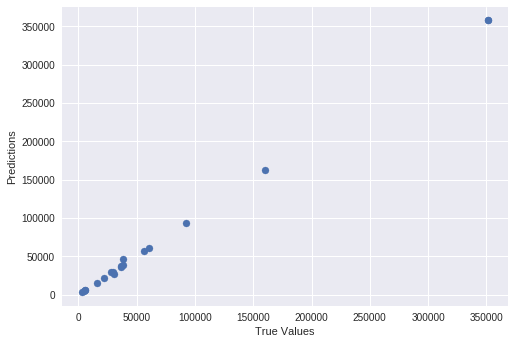

In [283]:
plt.scatter(y_test.values, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

In [284]:
"""
Regression metrics
See the Regression metrics section of the user guide for further details.

metrics.explained_variance_score(y_true, y_pred)	Explained variance regression score function
metrics.mean_absolute_error(y_true, y_pred)	Mean absolute error regression loss
metrics.mean_squared_error(y_true, y_pred[, …])	Mean squared error regression loss
metrics.mean_squared_log_error(y_true, y_pred)	Mean squared logarithmic error regression loss
metrics.median_absolute_error(y_true, y_pred)	Median absolute error regression loss
metrics.r2_score(y_true, y_pred[, …])	R^2 (coefficient of determination) regression score function.
"""
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score

print 'explained_variance_score: '
explained_variance_score(y_test, predictions)


explained_variance_score: 


0.9992955347488253

In [285]:

print 'mean_absolute_error: '
mean_absolute_error(y_test, predictions)



mean_absolute_error: 


1746.9944116811705

In [286]:

print 'mean_squared_error: '
mean_squared_error(y_test, predictions)



mean_squared_error: 


9066358.84577401

In [287]:
print 'median_absolute_error: '
median_absolute_error(y_test, predictions)



median_absolute_error: 


557.0431122436657

In [288]:
print 'r2_score: '
r2_score(y_test, predictions)

r2_score: 


0.9991324330327201